In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [103]:
allFacilities = pd.read_csv("output/describeNetwork.csv", dtype={'primary_naics': object})
naics = pd.read_csv("data/naics.csv", dtype={'2012 NAICS US Code': object})

In [104]:
#allFacilities.head()

In [105]:
naics = naics.drop(naics.columns[[0,3,4]], axis=1)
naics.columns = ["naics", "industry"]

In [112]:
naics[naics['naics'].str.len()==6]

,naics,industry
5,111110,Soybean Farming
7,111120,Oilseed (except Soybean) Farming
9,111130,Dry Pea and Bean Farming
11,111140,Wheat Farming
13,111150,Corn Farming
15,111160,Rice Farming
17,111191,Oilseed and Grain Combination Farming
18,111199,All Other Grain Farming
21,111211,Potato Farming
22,111219,Other Vegetable (except Potato) and Melon Farm...


In [125]:
allFacilities = allFacilities.merge(naics, left_on=["primary_naics"], right_on="naics", how="left")
allFacilities = allFacilities.drop("naics", axis=1)

In [126]:
allFacilities.to_csv('output/facilitiesWithNaics.csv')

In [127]:
# this makes dict of DFs, which are written to indivual .csv files
communities = defaultdict(dict)

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    communities[i]['ungroupedData'] = commData
    industries = commData.groupby(['primary_naics', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    communities[i]['groupedData'] = industries

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: order is deprecated, use sort_values(...)


In [128]:
for i in communities:
    communities[i]['groupedData'].to_csv('output/community{}.csv'.format(i))

In [129]:
# this does pretty much same as above, except writes to one master DF and .csv rather than separate files
commDict = {}

for i in allFacilities['Community'].unique():
    commData = allFacilities[allFacilities['Community']==i]
    industries = commData.groupby(['primary_naics', 'industry']).size().order(ascending=False)
    industries = industries.reset_index()
    industries = industries.rename(columns = {0:'countPerComm'})
    industries['percentPerComm'] = (industries['countPerComm'] / len(commData))*100
    industries['community'] = i
    commDict[i] = industries

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


In [130]:
commDF = pd.concat([commDict[f] for f in commDict])
cols = commDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
commDF = commDF[cols]
commDF = commDF.reset_index(drop=True)

In [131]:
commDF.to_csv('output/allCommunities.csv')

In [132]:
# print top n industries for each community
n = 3
commDF.groupby('community').head(n)

,community,primary_naics,industry,countPerComm,percentPerComm
0,0,221112,Fossil Fuel Electric Power Generation,13,8.724832
1,0,325180,Other Basic Inorganic Chemical Manufacturing,10,6.711409
2,0,332813,"Electroplating, Plating, Polishing, Anodizing,...",7,4.697987
75,1,424710,Petroleum Bulk Stations and Terminals,26,32.500000
76,1,325211,Plastics Material and Resin Manufacturing,5,6.250000
77,1,493190,Other Warehousing and Storage,4,5.000000
108,2,326199,All Other Plastics Product Manufacturing,6,66.666667
109,2,336112,Light Truck and Utility Vehicle Manufacturing,1,11.111111
110,2,326130,"Laminated Plastics Plate, Sheet (except Packag...",1,11.111111
112,3,324121,Asphalt Paving Mixture and Block Manufacturing,14,29.166667


In [133]:
# print bottom n industries for each community
n = 3
commDF.groupby('community').tail(n)

,community,primary_naics,industry,countPerComm,percentPerComm
72,0,331410,Nonferrous Metal (except Aluminum) Smelting an...,1,0.671141
73,0,327993,Mineral Wool Manufacturing,1,0.671141
74,0,212399,All Other Nonmetallic Mineral Mining,1,0.671141
105,1,335999,All Other Miscellaneous Electrical Equipment a...,1,1.250000
106,1,337215,"Showcase, Partition, Shelving, and Locker Manu...",1,1.250000
107,1,326220,Rubber and Plastics Hoses and Belting Manufact...,1,1.250000
109,2,336112,Light Truck and Utility Vehicle Manufacturing,1,11.111111
110,2,326130,"Laminated Plastics Plate, Sheet (except Packag...",1,11.111111
111,2,325991,Custom Compounding of Purchased Resins,1,11.111111
124,3,322299,All Other Converted Paper Product Manufacturing,1,2.083333


In [146]:
# print all industries for each community
allCommunities = commDF.groupby('community').apply(lambda x: x)
allCommunities[allCommunities['community'] == 0]  # Toggle through the communities

,community,primary_naics,industry,countPerComm,percentPerComm
0,0,221112,Fossil Fuel Electric Power Generation,13,8.724832
1,0,325180,Other Basic Inorganic Chemical Manufacturing,10,6.711409
2,0,332813,"Electroplating, Plating, Polishing, Anodizing,...",7,4.697987
3,0,325199,All Other Basic Organic Chemical Manufacturing,7,4.697987
4,0,331492,"Secondary Smelting, Refining, and Alloying of ...",5,3.355705
5,0,334413,Semiconductor and Related Device Manufacturing,4,2.684564
6,0,325998,All Other Miscellaneous Chemical Product and P...,4,2.684564
7,0,562112,Hazardous Waste Collection,4,2.684564
8,0,339991,"Gasket, Packing, and Sealing Device Manufactur...",4,2.684564
9,0,332431,Metal Can Manufacturing,4,2.684564


In [ ]:
# change community! (0-5)
# community = 0

# colsToDrop = ['Unnamed: 0','primary_naics', 'Betweeness', 'Closeness', 'Eigenvector']
# community_table = allFacilities[allFacilities['Community']==community].drop(colsToDrop, axis=1)
# community_table.columns = map(str.lower, community_table.columns)
# community_table

In [136]:
# Dioxin analysis
dioxin = pd.read_csv('data/ny_toxicreleases_2000_geoid_DIOXIN.csv')

In [137]:
dioxin_trim = dioxin[['geoid11','tri_facility_id','facility_name','primary_naics','n_5_2_stack_air','n_5_1_fugitive_air']]
dioxinMerge = dioxin_trim.merge(allFacilities, on='tri_facility_id')
dioxinMerge

,geoid11,tri_facility_id,facility_name,primary_naics_x,n_5_2_stack_air,n_5_1_fugitive_air,Unnamed: 0,Facility,Degrees,Clustering Coefficient,Betweeness,Closeness,Eigenvector,primary_naics_y,parent_company_name,Community,naics3,industry_x,industry_y,industry
0,36061004400,10009CNSLD801E1,CONSOLIDATED EDISON CO OF NEW YORK -EAST RIVER...,221112,0.41280,0.00,47,CONSOLIDATED EDISON CO OF NEW YORK - EAST RIVE...,99,0.644403,0.014112,0.556732,0.037795,221112,NaN,3,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
1,36063021700,14302CCDNT4700B,OCCIDENTAL CHEMICAL CORP NIAGARA PLANT,325181,0.03240,0.00,282,OCCIDENTAL CHEMICAL CORP NIAGARA PLANT,31,0.610753,0.009624,0.514685,0.006528,325180,OCCIDENTAL CHEMICAL HOLDING CORP,0,325180,Other Basic Inorganic Chemical Manufacturing,Other Basic Inorganic Chemical Manufacturing,Other Basic Inorganic Chemical Manufacturing
2,36021001700,12502SCHWT2424R,SCHWEITZER-MAUDUIT INTERNATIONAL INC,322121,0.01000,0.00,75,SCHWEITZER-MAUDUIT INTERNATIONAL INC,81,0.810494,0.009488,0.537226,0.036693,322121,SCHWEITZER-MAUDUIT INTERNATIONAL INC,3,322121,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills
3,36113070601,12801GLNSF313LO,LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT,327310,1.44840,0.00,203,LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT,62,0.782126,0.008406,0.530259,0.013015,327310,LEHIGH HANSON,0,327310,Cement Manufacturing,Cement Manufacturing,Cement Manufacturing
4,36067012900,13204FBRTK56IND,SYRACUSE ENERGY CORP,221112,0.25080,0.00,69,SYRACUSE ENERGY CORP,83,0.582427,0.016507,0.546805,0.023056,221112,GDF SUEZ ENERGY N.A.,0,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
5,36059416201,11558FBRRTMCCAR,NATIONAL GRID EF BARRETT POWER STATION,221112,0.19000,0.00,118,NATIONAL GRID EF BARRETT POWER STATION,70,1.000000,0.004405,0.524964,0.021406,221112,NATIONAL GRID USA,3,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
6,36081010701,11105STRGN18012,ASTORIA GENERATING STATION,221112,0.10000,0.00,60,ASTORIA GENERATING STATION,88,0.763845,0.009413,0.558422,0.054215,221112,US POWER GENERATING CO,3,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
7,36071010102,12550RSTNG992RA,ROSETON GENERATING FACILITY,221112,2.26000,0.00,239,CCI ROSETON LLC,49,0.666667,0.004786,0.521986,0.024237,221112,CASTLETON COMMODITIES INTERNATIONAL LLC,1,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
8,36081008500,11101CNSLD3854V,TRANSCANADA RAVENSWOOD POWER STATION,221112,0.92000,0.00,48,TRANSCANADA RAVENSWOOD POWER STATION,99,0.644403,0.014112,0.556732,0.037795,221112,TRANSCANADA LTD,3,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
9,36001014401,12143BLCRCROUTE,LAFARGE BUILDING MATERIALS INC,327310,1.89000,0.00,57,LAFARGE BUILDING MATERIALS INC,91,0.547253,0.015531,0.554217,0.017797,327310,LAFARGE N.A. INC,0,327310,Cement Manufacturing,Cement Manufacturing,Cement Manufacturing


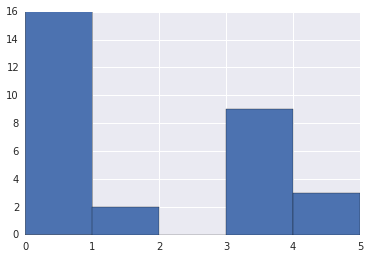

In [138]:
dioxinMerge['Community'].hist(bins=[0,1,2,3,4,5])

In [139]:
dioxinMerge[dioxinMerge['Community'] == 0]

,geoid11,tri_facility_id,facility_name,primary_naics_x,n_5_2_stack_air,n_5_1_fugitive_air,Unnamed: 0,Facility,Degrees,Clustering Coefficient,Betweeness,Closeness,Eigenvector,primary_naics_y,parent_company_name,Community,naics3,industry_x,industry_y,industry
1,36063021700,14302CCDNT4700B,OCCIDENTAL CHEMICAL CORP NIAGARA PLANT,325181,0.03240,0.00,282,OCCIDENTAL CHEMICAL CORP NIAGARA PLANT,31,0.610753,0.009624,0.514685,0.006528,325180,OCCIDENTAL CHEMICAL HOLDING CORP,0,325180,Other Basic Inorganic Chemical Manufacturing,Other Basic Inorganic Chemical Manufacturing,Other Basic Inorganic Chemical Manufacturing
3,36113070601,12801GLNSF313LO,LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT,327310,1.44840,0.00,203,LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT,62,0.782126,0.008406,0.530259,0.013015,327310,LEHIGH HANSON,0,327310,Cement Manufacturing,Cement Manufacturing,Cement Manufacturing
4,36067012900,13204FBRTK56IND,SYRACUSE ENERGY CORP,221112,0.25080,0.00,69,SYRACUSE ENERGY CORP,83,0.582427,0.016507,0.546805,0.023056,221112,GDF SUEZ ENERGY N.A.,0,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
9,36001014401,12143BLCRCROUTE,LAFARGE BUILDING MATERIALS INC,327310,1.89000,0.00,57,LAFARGE BUILDING MATERIALS INC,91,0.547253,0.015531,0.554217,0.017797,327310,LAFARGE N.A. INC,0,327310,Cement Manufacturing,Cement Manufacturing,Cement Manufacturing
11,36013035600,14048NGRMH106PO,DUNKIRK STEAM STATION,221112,0.28000,0.00,159,DUNKIRK STEAM STATION,68,0.730904,0.009927,0.533333,0.014999,221112,NRG ENERGY INC,0,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
14,36071011000,10940RVRSMRD2BA,REVERE SMELTING & REFINING CORP,331492,0.24100,0.00,191,REVERE SMELTING & REFINING CORP,67,0.704659,0.009836,0.538799,0.011930,331492,RSR CORP,0,331492,"Secondary Smelting, Refining, and Alloying of ...","Secondary Smelting, Refining, and Alloying of ...","Secondary Smelting, Refining, and Alloying of ..."
16,36113070500,12801FNCHP1GLEN,FINCH PAPER LLC,322121,0.27000,0.00,9,FINCH PAPER LLC,164,0.378498,0.032686,0.632302,0.056384,322121,FINCH PAPER HOLDINGS,0,322121,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills
17,36115084000,12832TLSCPCHURC,TELESCOPE CASUAL FURNITURE INC,337122,0.29574,0.00,331,TELESCOPE CASUAL FURNITURE INC,18,1.000000,0.002134,0.482940,0.003331,337122,NaN,0,337122,Nonupholstered Wood Household Furniture Manufa...,Nonupholstered Wood Household Furniture Manufa...,Nonupholstered Wood Household Furniture Manufa...
20,36109002300,14882SCYGL228MI,AES-CAYUGA LLC,221112,0.30000,0.00,41,CAYUGA OPERATING CO LLC,111,0.437674,0.024638,0.573209,0.030004,221112,"UPSTATE NEW YORK POWER PRODUCERS,INC.",0,221112,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation,Fossil Fuel Electric Power Generation
21,36031961200,12883NTRNTSHORE,INTERNATIONAL PAPER,322121,0.53000,0.00,7,INTERNATIONAL PAPER,178,0.336380,0.042153,0.651327,0.065183,322121,INTERNATIONAL PAPER CO,0,322121,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills,Paper (except Newsprint) Mills


In [140]:
dioxinMerge.groupby(['Community','primary_naics_x']).agg(['count'])

geoid11 tri_facility_id facility_name  \
                            count           count         count   
Community primary_naics_x                                         
0         221112                6               6             6   
          322121                2               2             2   
          325181                1               1             1   
          325199                1               1             1   
          325212                1               1             1   
          325992                1               1             1   
          327310                2               2             2   
          331492                1               1             1   
          337122                1               1             1   
1         221112                1               1             1   
          327992                1               1             1   
3         221112                7               7             7   
          322121                1               1             1   
          331312                1               1             1   
4         331312                1               1             1   
          331314                1               1             1   
          331315                1               1             1   

                          n_5_2_stack_air n_5_1_fugitive_air Unnamed: 0  \
                                    count              count      count   
Community primary_naics_x                                                 
0         221112                        6                  6          6   
          322121                        2                  2          2   
          325181                        1                  1          1   
          325199                        1                  1          1   
          325212                        1                  1          1   
          325992                        1                  1          1   
          327310                        2                  2          2   
          331492                        1                  1          1   
          337122                        1                  1          1   
1         221112                        1                  1          1   
          327992                        1                  1          1   
3         221112                        7                  7          7   
          322121                        1                  1          1   
          331312                        1                  1          1   
4         331312                        1                  1          1   
          331314                        1                  1          1   
          331315                        1                  1          1   

                          Facility Degrees Clustering Coefficient Betweeness  \
                             count   count                  count      count   
Community primary_naics_x                                                      
0         221112                 6       6                      6          6   
          322121                 2       2                      2          2   
          325181                 1       1                      1          1   
          325199                 1       1                      1          1   
          325212                 1       1                      1          1   
          325992                 1       1                      1          1   
          327310                 2       2                      2          2   
          331492                 1       1                      1          1   
          337122                 1       1                      1          1   
1         221112                 1       1                      1          1   
          327992                 1       1                      1          1   
3         221112                 7       7                      